# 1. Introduction

In this tutorial we want to improve the performance of the model in [Bag of words meet bag of popcorn: warm up](https://github.com/bright1993ff66/Text-Data-Analysis/blob/master/Sentiment%20Analysis/Kaggle%20%20Bag%20of%20Words%20Meets%20Bags%20of%20Popcorn/Bag%20of%20words%20meet%20bag%20of%20popcorn_warm%20up.ipynb). In this [competition](https://www.kaggle.com/c/word2vec-nlp-tutorial#evaluation), the area under the ROC curve is used to judge a model's performance. Hence we will use it to select the best model. Let's first import the useful modules.

In this tutorial, neural network is not included but it will be discussed in the next tutorial.

By the way, this [link](http://www.navan.name/roc/) and this [video](https://www.youtube.com/watch?v=OAl6eAyP-yo) gives a great explanation of the ROC and the AUC.

In [23]:
import re
import time
import logging
from bs4 import BeautifulSoup

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import nltk
from nltk import data
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.manifold import TSNE

import tensorflow as tf

import gensim
from gensim import models
from gensim.models import Word2Vec
from gensim.scripts.glove2word2vec import glove2word2vec

And load the relevant numpy arrays.

In [2]:
""""
header=0: indicates that the first line of the file contains column names
"delimiter=\t": indicates that the fields are separated by tabs
quoting=3: tells Python to ignore doubled quotes
"""

labeled_train = pd.read_csv("labeledTrainData.tsv", header=0, delimiter="\t", quoting=3)
unlabeled_train = pd.read_csv("unlabeledTrainData.tsv", header=0, delimiter="\t", quoting=3)
test_data = pd.read_csv("testData.tsv", header=0, delimiter="\t", quoting=3)

trainDataVecs = np.load('training_data.npy')
testDataVecs = np.load('test_data.npy')

# 2. Improve the Performance - Other machine learning tools

Based on the end of the previous section, we could improve the performance of our current sentiment analysis model in two ways.

## 2.1 Choose the right model

To choose the right model, we should first build our machine learning datas, which include training data, validation data and test data.

In [3]:
# Construct the training data, validation data and the test data

training_data = trainDataVecs[0:15000,:]
training_data_label = labeled_train['sentiment'][:15000]
validation_data = trainDataVecs[15000:20000,:]
validation_data_label = labeled_train['sentiment'][15000:20000]
test_data_for_train = trainDataVecs[20000:,:]
test_data_for_train_label = labeled_train['sentiment'][20000:]

Then we could use the training dataset to train the machine learning model such as random forest, support vector machine etc and use the validation data to choose the model that performs best.

In [4]:
# logistics regression

print('Logistics Regression starts.....')

start = time.time()

lr = LogisticRegression(C=40, random_state=0)                          
lr.fit(training_data, training_data_label)
result_lr = lr.predict(validation_data)
true = np.array(validation_data_label)
result_prob_lr = lr.predict_proba(validation_data)[:, 1]

# Calculating the precision score
precision_lr = metrics.precision_score(true, result_lr)

# Calculating the AUC
fpr_lr, tpr_lr, thresholds_lr = metrics.roc_curve(true, result_prob_lr, pos_label=1)
auc_lr = metrics.auc(fpr_lr, tpr_lr)

end = time.time()

print('Total time for training is: ', end - start, ' seconds\n')
print('The area under the curve is: ', auc_lr)
print('The precision score is: ', precision_lr)

Logistics Regression starts.....
Total time for training is:  1.4161303043365479  seconds

The area under the curve is:  0.949478501226
The precision score is:  0.885425101215


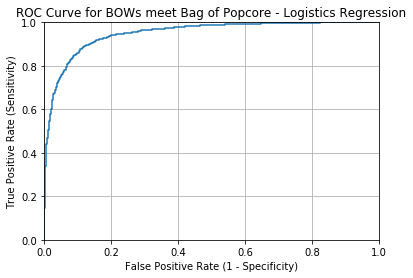

In [5]:
plt.plot(fpr_lr, tpr_lr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for BOWs meet Bag of Popcore - Logistics Regression')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

In [6]:
# random forest

print('Random Forest starts....')

start = time.time()

forest = RandomForestClassifier(n_estimators = 100)
forest = forest.fit( training_data, training_data_label )
result_forest = forest.predict(validation_data)
result_prob_forest = forest.predict_proba(validation_data)[:, 1]

# Calculating the precision score
precision_forest = metrics.precision_score(true, result_forest)

# Calculating the AUC
fpr_forest, tpr_forest, thresholds_forest = metrics.roc_curve(true, result_prob_forest, pos_label=1)
auc_forest = metrics.auc(fpr_forest, tpr_forest)

end = time.time()
print('Total time for training is: ', end - start, ' seconds\n')
print('The area under the curve is: ', auc_forest)
print('The precision score is: ', precision_forest)

Random Forest starts....
Total time for training is:  24.811062574386597  seconds

The area under the curve is:  0.9143638771
The precision score is:  0.828235294118


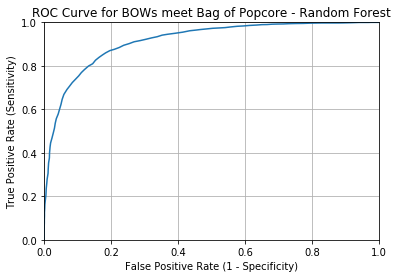

In [7]:
plt.plot(fpr_forest, tpr_forest)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for BOWs meet Bag of Popcore - Random Forest')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

In [8]:
# support vector machine

print('Support Vector Machine starts....')

start = time.time()

# The probability = True means that we want to work out the probability of a review being classified as label == 1
svm = SVC(C = 200, kernel = 'rbf', probability = True)
svm.fit(training_data, training_data_label)
result_svm = svm.predict(validation_data)
result_prob_svm = svm.predict_proba(validation_data)[:, 1]

# Calculating the precision score
precision_svm = metrics.precision_score(true, result_svm)

# Calculating the AUC
fpr_svm, tpr_svm, thresholds_svm = metrics.roc_curve(true, result_prob_svm, pos_label=1)
auc_svm = metrics.auc(fpr_svm, tpr_svm)

end = time.time()
print('Total time for training is: ', end - start, ' seconds\n')
print('The area under the curve is: ', auc_svm)
print('The precision score is: ', precision_svm)

Support Vector Machine starts....
Total time for training is:  446.7199196815491  seconds

The area under the curve is:  0.938837638155
The precision score is:  0.862635162195


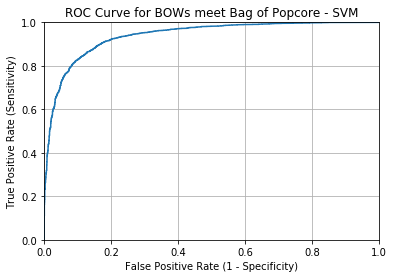

In [9]:
plt.plot(fpr_svm, tpr_svm)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for BOWs meet Bag of Popcore - SVM')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

I tried the above model with various values of hyperparamters. And it is true that if you, for instance, increase the value of C in logistics regression, the area under the ROC curve increases. Here we use logistics regression to output the results.

In [10]:
# Test & extract results 
result = lr.predict( testDataVecs )

# Write the test results 
output = pd.DataFrame( data={"id":test_data["id"], "sentiment":result} )
output.to_csv( "Word2Vec_AverageVectors.csv", index=False, quoting=3 )

We could also plot the ROC curves above together in one plot and get a more intuitve answer of which model performs better.

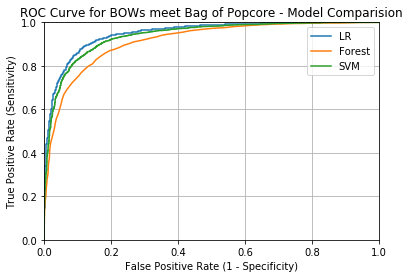

In [30]:
plt.plot(fpr_lr, tpr_lr, label = 'LR')
plt.plot(fpr_forest, tpr_forest, label = 'Forest')
plt.plot(fpr_svm, tpr_svm, label = 'SVM')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC Curve for BOWs meet Bag of Popcore - Model Comparision')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.legend()
plt.show()

## 2.2 Use pre-trained word embedding

Another path for improving performance is to consider using pretrained word embedding. The pretrained word embedding, such as [Glove Embedding](http://nlp.stanford.edu/data/glove.6B.zip), is trained with much larger text data and based on it, we may work out more accurate review representation.

The following codes show how to generate word vectors using Glove.

In [11]:
glove_input_file = 'glove.6B.300d.txt'
word2vec_output_file = 'glove.6B.300d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)

(400000, 300)

In [12]:
filename = 'glove.6B.300d.txt.word2vec'
model_Glove = models.KeyedVectors.load_word2vec_format(filename, binary=False)

In [13]:
model_Glove['movie']

array([-0.138     , -0.12203   ,  0.0054643 , -0.010215  ,  0.13134   ,
        0.28615999, -0.36436   , -0.035735  , -0.17218   , -0.38863999,
        0.58636999,  0.13189   , -0.1513    ,  0.35515001, -0.34298   ,
       -0.54394001, -0.40301999, -0.17129   ,  0.19899   ,  0.24316999,
        0.21332   ,  0.60334998,  0.22555999,  0.46382001,  0.064101  ,
        0.36409   ,  0.25328001, -0.79771   ,  0.26771   ,  0.42462   ,
       -0.62075001,  0.31208   , -0.25316   ,  0.13562   , -1.13230002,
        0.0099104 , -0.62471002, -0.048047  ,  0.23139   ,  0.16102   ,
        0.24774   , -0.26148999, -0.17341   ,  0.34005001,  0.21511   ,
       -0.26714   ,  0.45697999, -0.13671   ,  0.11654   , -0.12222   ,
        0.062068  , -0.45585001, -0.30114999,  0.11208   ,  0.31145999,
       -0.048065  ,  0.10067   ,  0.1441    ,  0.27138999, -0.17809001,
       -0.41069001,  0.093994  ,  0.49900001,  0.023845  ,  0.42438   ,
       -0.027703  ,  0.044485  , -0.15928   ,  0.45054001,  0.13

Then we follow the previous steps of generating represenation of each review.

In [14]:
def makeFeatureVec(sentence, model, num_features):
    # Function to average all of the word vectors in a given
    # paragraph
    #
    # Pre-initialize an empty numpy array (for speed)
    featureVec = np.zeros((300,),dtype="float32")
    #
    nwords = 0.
    #
    # Index2word is a list that contains the names of the words in 
    # the model's vocabulary. Convert it to a set, for speed 
    index2word_set = set(model.wv.index2word)
    # Loop over each word in the review
    for word in sentence:
        if word in index2word_set:
            nwords = nwords + 1.
            featureVec = np.add(featureVec,model[word])
    # 
    # Divide the result by the number of words to get the average
    featureVec = np.divide(featureVec,nwords)
    return featureVec

def getAvgFeatureVecs(reviews, model, num_features):
    # Given a set of reviews (each one a list of words), calculate 
    # the average feature vector for each one and return a 2D numpy array 
    # 
    # Initialize a counter
    counter = 0
    # 
    # Preallocate a 2D numpy array, for speed
    reviewFeatureVecs = np.zeros((len(reviews),num_features),dtype="float32")
    # 
    # Loop through the reviews
    for review in reviews:
       #
       # Print a status message every 1000th review
        if counter % 1000. == 0.:
            print("Review %d of %d" % (counter, len(reviews)))
       # 
       # Call the function (defined above) that makes average feature vectors
        reviewFeatureVecs[int(counter),] = makeFeatureVec(review, model, num_features)
       #
       # Increment the counter
        counter = counter + 1.
    return reviewFeatureVecs

In [15]:
def review_to_words(raw_review, remove_stopwords = False ):

    # 1. Remove HTML
    try:
        review_text = BeautifulSoup(raw_review).get_text() 
    except TypeError:
        # Here if we just use the beautifulsoup to clean the data, we notice that some texts just become none 
        # and it will cause TypeError. Hence, we just add a value to this None case.
        review_text = "None"
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. Remove stop words
    # In Python, searching a set is much faster than searchin a list, so convert the stop words to a set
    if remove_stopwords:
        stops = set(stopwords.words("english"))                  
        words = [w for w in words if not w in stops]   
    #
    # 5. Join the words back into one string separated by space, and return the result.
    return words

# Get the number of reviews based on the dataframe column size
num_reviews = labeled_train["review"].size

# Initialize an empty list to hold the clean reviews
clean_labeled_train_reviews = []

print('Cleaning the labeled training set movie reviews...')

# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list 
for i in range(num_reviews):
    if ((i+1) % 1000 == 0):
        print("Review %d of %d\n" % ( i+1, num_reviews ))
    clean_labeled_train_reviews.append( review_to_words( labeled_train["review"][i] ) )

Cleaning the labeled training set movie reviews...


f:\python\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file f:\python\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "html5lib")

  markup_type=markup_type))


Review 1000 of 25000

Review 2000 of 25000

Review 3000 of 25000

Review 4000 of 25000

Review 5000 of 25000

Review 6000 of 25000

Review 7000 of 25000

Review 8000 of 25000

Review 9000 of 25000

Review 10000 of 25000

Review 11000 of 25000

Review 12000 of 25000

Review 13000 of 25000

Review 14000 of 25000

Review 15000 of 25000

Review 16000 of 25000

Review 17000 of 25000

Review 18000 of 25000

Review 19000 of 25000

Review 20000 of 25000

Review 21000 of 25000

Review 22000 of 25000

Review 23000 of 25000

Review 24000 of 25000

Review 25000 of 25000



In [16]:
# Get the number of reviews based on the dataframe column size
num_reviews = test_data["review"].size

# Initialize an empty list to hold the clean reviews
clean_test_data_reviews = []

print('Cleaning the test dataset movie reviews...')

# Loop over each review; create an index i that goes from 0 to the length
# of the movie review list 

for i in range(num_reviews):
    if ((i+1) % 1000 == 0):
        print("Review %d of %d\n" % ( i+1, num_reviews ))
    clean_test_data_reviews.append( review_to_words( test_data["review"][i] ) )

Cleaning the test dataset movie reviews...


f:\python\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html5lib"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file f:\python\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "html5lib")

  markup_type=markup_type))


Review 1000 of 25000

Review 2000 of 25000

Review 3000 of 25000

Review 4000 of 25000

Review 5000 of 25000

Review 6000 of 25000

Review 7000 of 25000

Review 8000 of 25000

Review 9000 of 25000

Review 10000 of 25000

Review 11000 of 25000

Review 12000 of 25000

Review 13000 of 25000

Review 14000 of 25000

Review 15000 of 25000

Review 16000 of 25000

Review 17000 of 25000

Review 18000 of 25000

Review 19000 of 25000

Review 20000 of 25000

Review 21000 of 25000

Review 22000 of 25000

Review 23000 of 25000

Review 24000 of 25000

Review 25000 of 25000



In [17]:
# ****************************************************************
# Calculate average feature vectors for training and testing sets,
# using the functions we defined above. Notice that we now use stop word
# removal.

# You should run the codes again in Bag of words meet bag of popcorn_warm up to get the clean_labeled_train_reviews and the 
# clean_test_data_reviews

print("Creating average feature vecs for training reviews")

trainDataVecs_Glove = getAvgFeatureVecs(clean_labeled_train_reviews, model_Glove, 300)

print("Creating average feature vecs for test reviews")

testDataVecs_Glove = getAvgFeatureVecs(clean_test_data_reviews, model_Glove, 300)

Creating average feature vecs for training reviews
Review 0 of 25000
Review 1000 of 25000
Review 2000 of 25000
Review 3000 of 25000
Review 4000 of 25000
Review 5000 of 25000
Review 6000 of 25000
Review 7000 of 25000
Review 8000 of 25000
Review 9000 of 25000
Review 10000 of 25000
Review 11000 of 25000
Review 12000 of 25000
Review 13000 of 25000
Review 14000 of 25000
Review 15000 of 25000
Review 16000 of 25000
Review 17000 of 25000
Review 18000 of 25000
Review 19000 of 25000
Review 20000 of 25000
Review 21000 of 25000
Review 22000 of 25000
Review 23000 of 25000
Review 24000 of 25000
Creating average feature vecs for test reviews
Review 0 of 25000
Review 1000 of 25000
Review 2000 of 25000
Review 3000 of 25000
Review 4000 of 25000
Review 5000 of 25000
Review 6000 of 25000
Review 7000 of 25000
Review 8000 of 25000
Review 9000 of 25000
Review 10000 of 25000
Review 11000 of 25000
Review 12000 of 25000
Review 13000 of 25000
Review 14000 of 25000
Review 15000 of 25000
Review 16000 of 25000
Revi

In [18]:
np.save('trainDataVecs_Glove', trainDataVecs_Glove )
np.save('testDataVecs_Glove', testDataVecs_Glove)

In [19]:
trainDataVecs_Glove = np.load('trainDataVecs_Glove.npy')
testDataVecs_Glove = np.load('testDataVecs_Glove.npy')

In [20]:
training_data_Glove = trainDataVecs_Glove[0:15000,:]
training_data_label_Glove = labeled_train['sentiment'][:15000]
validation_data_Glove = trainDataVecs_Glove[15000:20000,:]
validation_data_label_Glove = labeled_train['sentiment'][15000:20000]
test_data_for_train_Glove = trainDataVecs_Glove[20000:,:]
test_data_for_train_label_Glove = labeled_train['sentiment'][20000:]

In [21]:
# logistics regression

print('Logistics Regression Glove starts.....')

start = time.time()

lr = LogisticRegression(C=40, random_state=0)                          
lr.fit(training_data_Glove, training_data_label_Glove)
result_lr_Glove = lr.predict(validation_data_Glove)
true = np.array(validation_data_label_Glove)
result_prob_lr_Glove = lr.predict_proba(validation_data_Glove )[:, 1]

# Calculating the precision score
precision_lr_Glove = metrics.precision_score(true, result_lr_Glove )

# Calculating the AUC
fpr_lr_Glove, tpr_lr_Glove, thresholds_lr_Glove = metrics.roc_curve(true, result_prob_lr_Glove, pos_label=1)
auc_lr_Glove = metrics.auc(fpr_lr_Glove, tpr_lr_Glove)

end = time.time()

print('Total time for training is: ', end - start, ' seconds\n')
print('The area under the curve is: ', auc_lr_Glove)
print('The precision score is: ', precision_lr_Glove)

Logistics Regression Glove starts.....
Total time for training is:  2.9259889125823975  seconds

The area under the curve is:  0.918438183775
The precision score is:  0.846091861402


In [22]:
# Test & extract results 
result = lr.predict( testDataVecs_Glove )

# Write the test results 
output = pd.DataFrame( data={"id":test_data["id"], "sentiment":result} )
output.to_csv( "Word2Vec_AverageVectors.csv", index=False, quoting=3 )